<a href="https://colab.research.google.com/github/RoetGer/decisions-under-uncertainty/blob/main/solved_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ex**: Assume 100 iid samples from a Poisson distribution with mean 1. What is the probabílity that the sum of samples is below 90?

Solution approach:

*   X_i ~ Pois(lambda)
*   Assume Y = sum(X_i)
*   Realize that Y = n*mean(X)
*   P(Y <= 90) = P(n*mean(X) <= 90) = P(mean(X) <= 90/n) 
*   Use central limit theorem to approximate distribution of mean(X), that is mean(X) ~ N(lambda, lambda/n)
*   P(sqrt(n)(mean(X) - lambda)/sqrt(lambda) <= sqrt(n)(90/n - lambda)/sqrt(lambda))



In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

plt.rc('figure', figsize=(12, 10))
plt.rc('font', size=12)

In [10]:
n = 100
val_to_compare = 90
pois_lambda = 1

stand_X = np.sqrt(n)*(1 - pois_lambda)/np.sqrt(pois_lambda)
stand_90 = np.sqrt(n)*(val_to_compare/n - pois_lambda)/np.sqrt(pois_lambda)

norm.cdf(stand_90, loc=0, scale=1)

0.15865525393145707

In [11]:
norm.cdf(0.9, loc=1., scale=np.sqrt(pois_lambda/n))

0.15865525393145707

In [13]:
norm.cdf(90, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.15865525393145707

Simulation study to test results ;)

In [22]:
samples = np.random.poisson(lam=1., size=(100000, n))
np.mean(samples.sum(axis=1) < 90)

0.14677

Difference can be explained that for the actual random variable of sum over the different samples, having a sum of 90 has a positive probability. In contrast, the CLT approximation assigns a probability of 0 to the event of observing 90. As the question asks for below 90, this leads to the difference, as the CDF evaluates X <= 90 instead of X < 90.

In [23]:
norm.cdf(89, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.13566606094638267

**Ex2**: Conduct a t-test in Python.

Assumptions 2-sample t-test:
* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


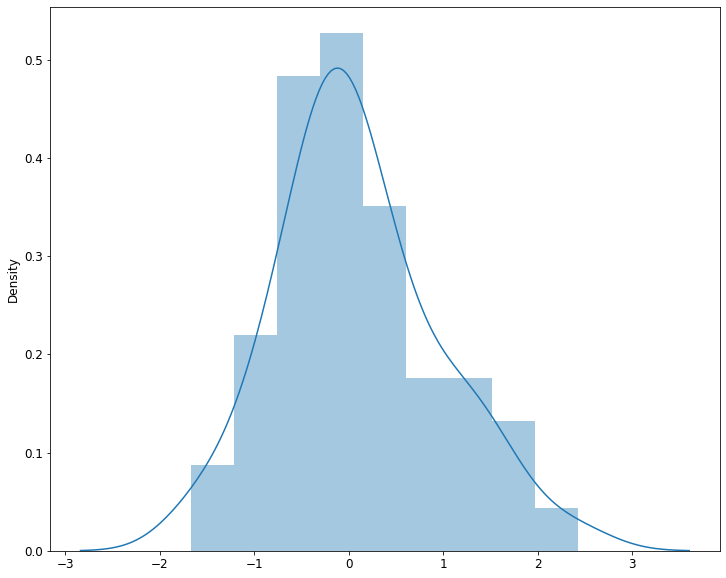

In [50]:
import seaborn as sns
np.random.seed(5)
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=1.)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

sns.distplot(samples)

Group
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Observations, dtype: object

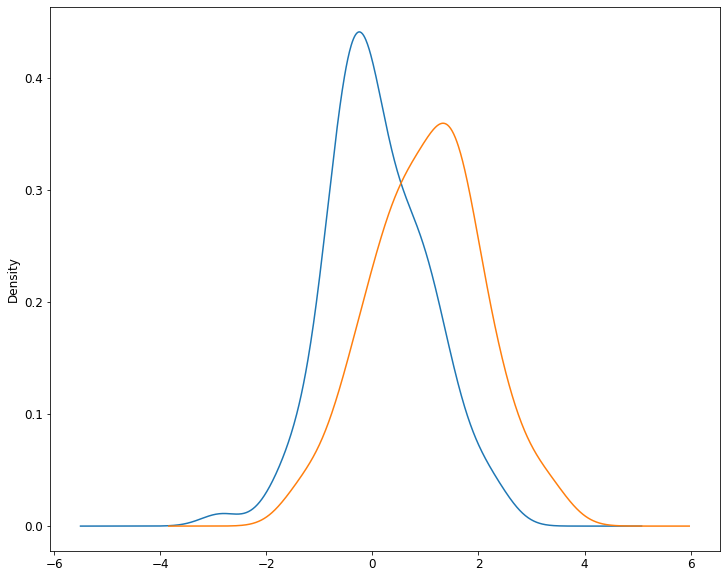

In [51]:
df.groupby('Group').Observations.plot.kde()

In [37]:
tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B)
pval

8.297351792523914e-07

Ex: Conduct a 2 sample t-test with unequal variance (Welch t-test) in Python.

"
In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test,[1] and is more reliable when the two samples have unequal variances and/or unequal sample sizes"

Ex: Conduct a test for difference in ratios in Python.

Ex: Conduct an equivalence test in Python

In [ ]:
??sm.stats.ttost_ind

Ex: Check whether a coin is unbiased (frequentist)

Ex: Check whether a coin is unbiased (Bayesian)

Ex: Run Chi-square independence test in Python

Ex: Run Wilcoxon test in Python

Ex: Run ANOVA in Python 

Ex: Run Kruskal-Wallis n Python

Ex: Create bootstrap confidence intervals in Python

Ex: Run permutation test in Python

Ex: Conduct a sample size computation for t-test